### ARMA Model
* AR: Auto Regression
* MA: Moving Average

Good for forecasting Sales, Monthly Productions, etc.

######  Interview Question: Do you use PACF plot or ACF plot for moving average ?
* Moving Average is done by ACF
* Auto Regression is by PACF

### ARMA Model
* AR: Auto Regression
* I: Integrated
* MA: Moving Average


In [2]:
## import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sms
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
df=pd.read_csv('airline_passengers.csv')

In [4]:
df.head()

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    145 non-null    object 
 1   Thousands of Passengers  144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.4+ KB


In [7]:
df.describe()

,Thousands of Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [8]:
df.isnull().sum()

Month                      0
Thousands of Passengers    1
dtype: int64

In [10]:
df.tail()

,Month,Thousands of Passengers
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0
144,International airline passengers: monthly tota...,NaN


In [11]:
df.dropna(inplace =True)

In [12]:
df.isna().sum()

Month                      0
Thousands of Passengers    0
dtype: int64

In [13]:
df['Month']=pd.to_datetime(df['Month'])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    144 non-null    datetime64[ns]
 1   Thousands of Passengers  144 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.4 KB


In [16]:
df.set_index('Month', inplace= True)

In [18]:
df.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


<Axes: xlabel='Month'>

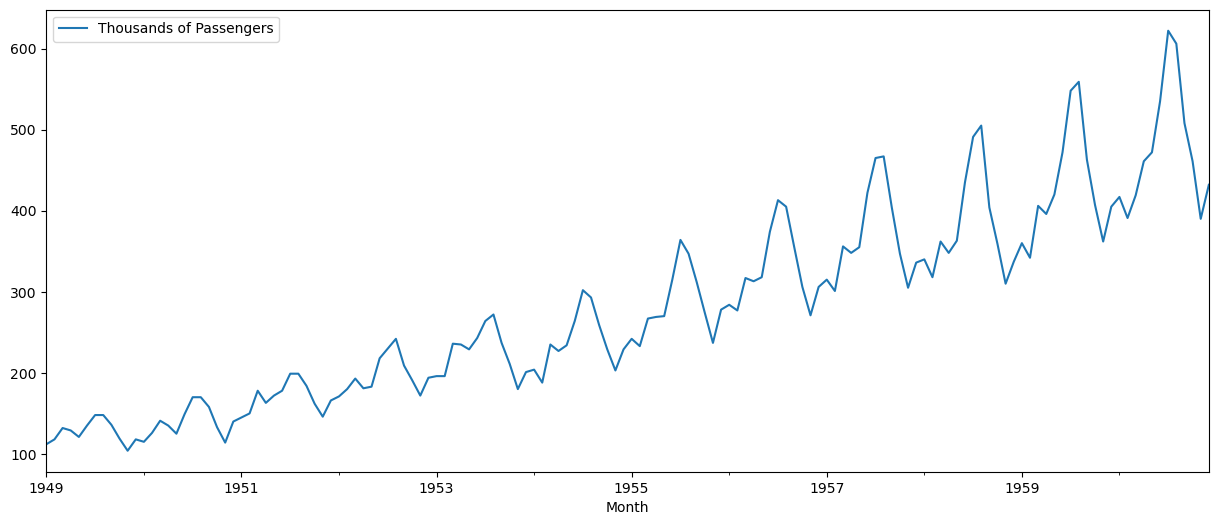

In [20]:
df.plot(figsize=(15,6))

This is a seasonal data with upward trend. It is not stationary. We will use dickey fuller test on this data

In [21]:
## importing dickey fuller test
from statsmodels.tsa.stattools import adfuller

In [23]:
def adf_test(Series):
    result=adfuller(Series)
    print('ADF Statistics:{}'.format(result[0]))
    print('p-value:{}'.format(result[1]))
    if result[1]<=0.05:
        print('Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary')
    else:
        print('Weak evidence against the null hypothesis indicationg it is not stationary')

In [24]:
adf_test(df)

ADF Statistics:0.8153688792060435
p-value:0.9918802434376409
Weak evidence against the null hypothesis indicationg it is not stationary


## Using Differencing Techniques

In [25]:
## Performing Differencing
df['First Diff']=df['Thousands of Passengers']-df['Thousands of Passengers'].shift(1)

In [26]:
df.head()

,Thousands of Passengers,First Diff
Month,,
1949-01-01,112.0,NaN
1949-02-01,118.0,6.0
1949-03-01,132.0,14.0
1949-04-01,129.0,-3.0
1949-05-01,121.0,-8.0


In [27]:
adf_test(df['First Diff'].dropna())

ADF Statistics:-2.829266824169982
p-value:0.054213290283827854
Weak evidence against the null hypothesis indicationg it is not stationary


<Axes: xlabel='Month'>

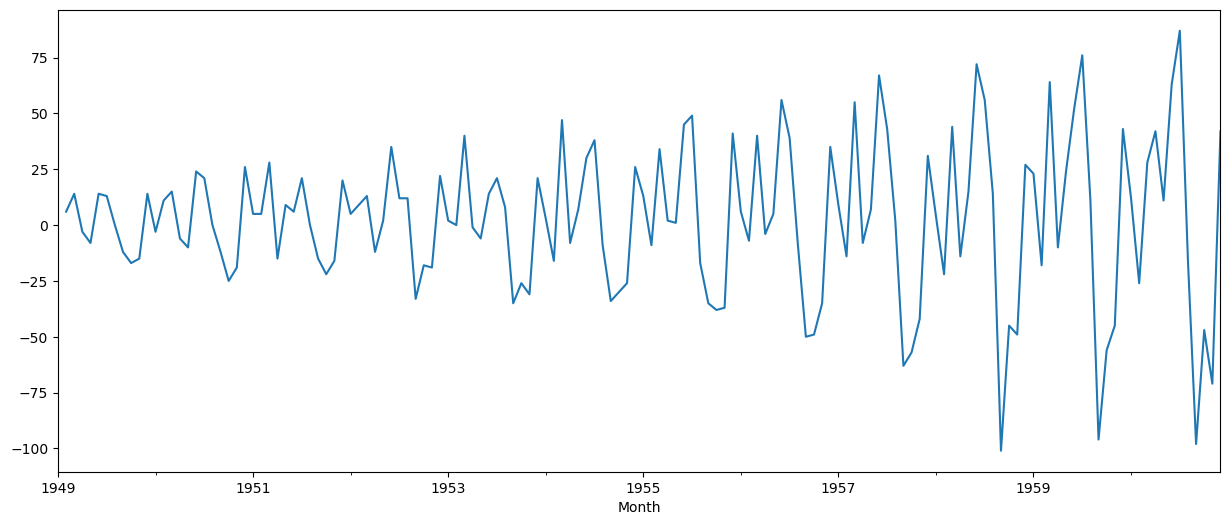

In [29]:
## Plotting First Differencing
df['First Diff'].plot(figsize=(15,6))

In [30]:
## Performing Second Differencing
df['Second Diff']=df['First Diff']-df['First Diff'].shift(1)

In [31]:
adf_test(df['Second Diff'].dropna())

ADF Statistics:-16.38423154246855
p-value:2.732891850013928e-29
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


<Axes: xlabel='Month'>

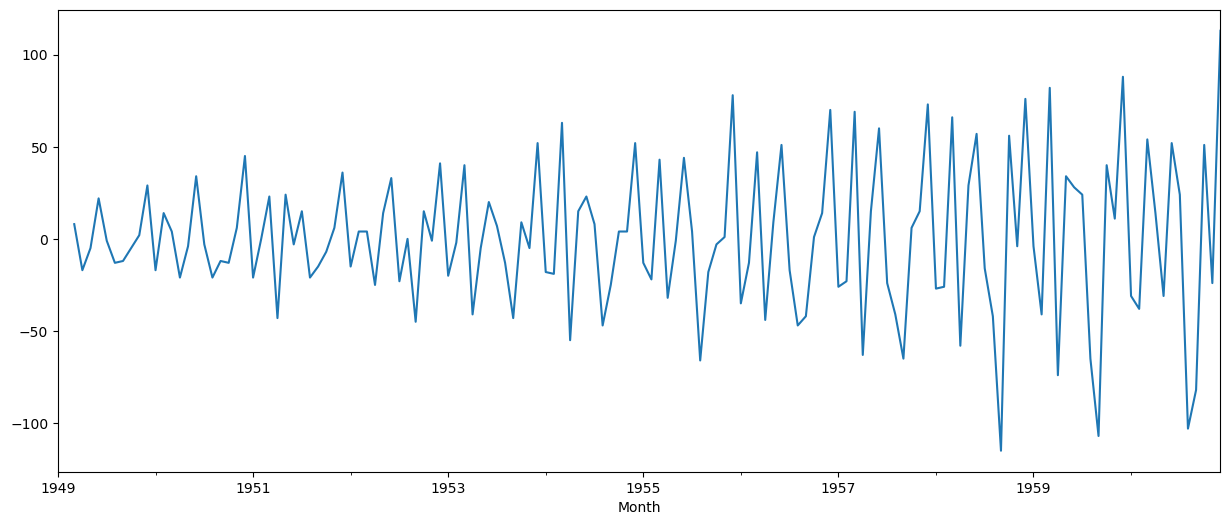

In [33]:
## Plotting the Second Differencing
df['Second Diff'].plot(figsize=(15,6))

We can see that the data is now stationary

In [34]:
## 12 Months- Seasonal Data
df['12 Diff']=df['Thousands of Passengers']-df['Thousands of Passengers'].shift(12)

In [35]:
adf_test(df['12 Diff'].dropna())

ADF Statistics:-3.3830207264924805
p-value:0.011551493085514982
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


<Axes: xlabel='Month'>

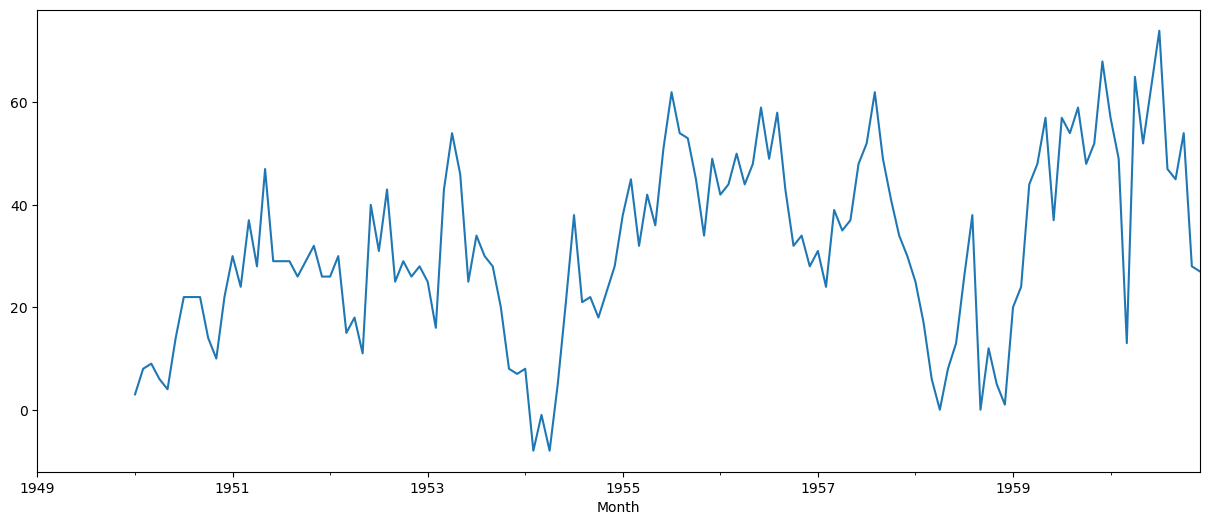

In [36]:
df['12 Diff'].plot(figsize=(15,6))

In [37]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

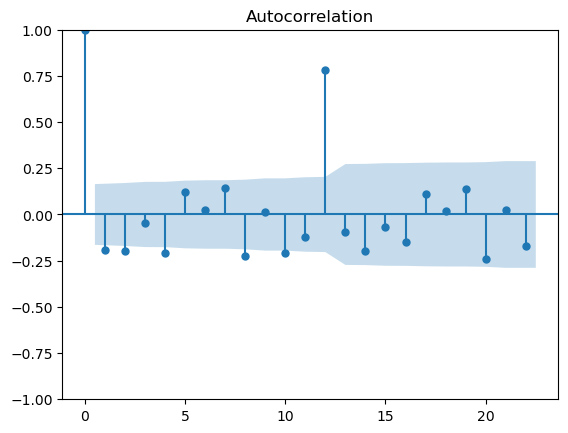

In [39]:
acf=plot_acf(df['Second Diff'].dropna())

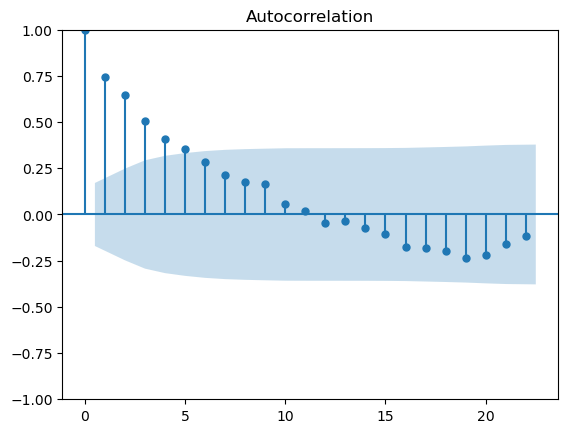

In [40]:
acf_12=plot_acf(df['12 Diff'].dropna())

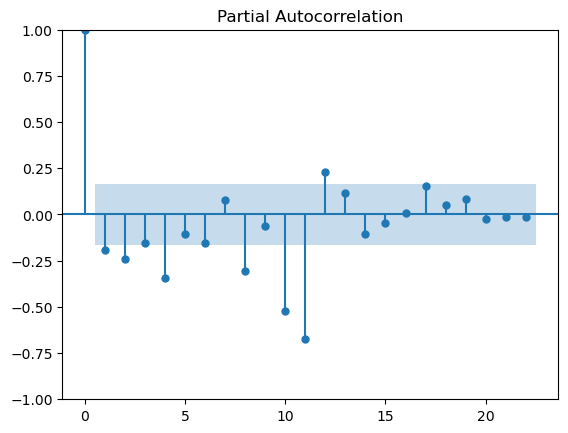

In [41]:
pacf=plot_pacf(df['Second Diff'].dropna())

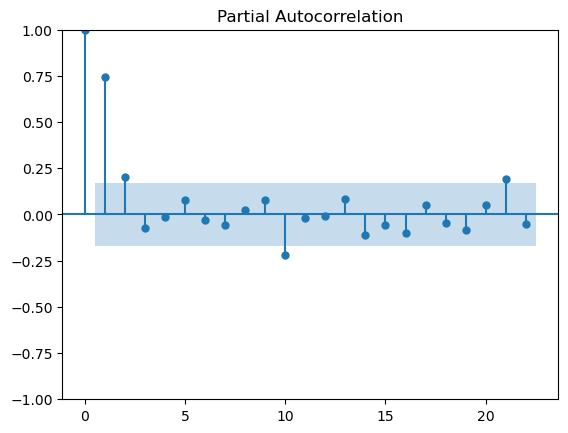

In [43]:
pacf12=plot_pacf(df['12 Diff'].dropna())

In [44]:
## plotting the dataframe
df.head()

,Thousands of Passengers,First Diff,Second Diff,12 Diff
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN


In [46]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [47]:
from datetime import datetime, timedelta
train_dataset_end=datetime(1955,12,1)
test_dataset_end=datetime(1960,12,1)

In [48]:
train_data=df[:train_dataset_end]
test_data=df[train_dataset_end+timedelta(days=1):test_dataset_end]

In [49]:
## prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [50]:
test_data

,Thousands of Passengers,First Diff,Second Diff,12 Diff
Month,,,,
1956-01-01,284.0,6.0,-35.0,42.0
1956-02-01,277.0,-7.0,-13.0,44.0
1956-03-01,317.0,40.0,47.0,50.0
1956-04-01,313.0,-4.0,-44.0,44.0
1956-05-01,318.0,5.0,9.0,48.0
1956-06-01,374.0,56.0,51.0,59.0
1956-07-01,413.0,39.0,-17.0,49.0
1956-08-01,405.0,-8.0,-47.0,58.0
1956-09-01,355.0,-50.0,-42.0,43.0


In [52]:
from statsmodels.tsa.arima.model import ARIMA

In [64]:
model_ARIMA=ARIMA(train_data['Thousands of Passengers'],order=(10,2,0))

In [65]:
model_fit=model_ARIMA.fit()

In [66]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  SARIMAX Results                                  
===================================================================================
Dep. Variable:     Thousands of Passengers   No. Observations:                   84
Model:                     ARIMA(10, 2, 0)   Log Likelihood                -357.239
Date:                     Sat, 23 Dec 2023   AIC                            736.477
Time:                             00:36:18   BIC                            762.951
Sample:                         01-01-1949   HQIC                           747.106
                              - 12-01-1955                                         
Covariance Type:                       opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5166      0.121     -4.262      0.000      -0.754      -0.279
ar.L2         -0.7204      0.121     -5.940      0.000      -0.958      -0.483
ar.L3         -0.4857      0.125     -3.876      0.000      -0.731      -0.240
ar.L4         -0.7505      0.129     -5.819      0.000      -1.003      -0.498
ar.L5         -0.5062      0.169     -2.991      0.003      -0.838      -0.175
ar.L6         -0.5200      0.141     -3.683      0.000      -0.797      -0.243
ar.L7         -0.3051      0.143     -2.127      0.033      -0.586      -0.024
ar.L8         -0.5939      0.155     -3.833      0.000      -0.898      -0.290
ar.L9         -0.2963      0.132     -2.241      0.025      -0.555      -0.037
ar.L10        -0.4825      0.110     -4.376      0.000      -0.699      -0.266
sigma2       336.0939     66.064      5.087      0.000     206.612     465.576
===================================================================================
Ljung-Box (L1) (Q):                  10.86   Jarque-Bera (JB):                 1.24
Prob(Q):                              0.00   Prob(JB):                         0.54
Heteroskedasticity (H):               2.85   Skew:                             0.24
Prob(H) (two-sided):                  0.01   Kurtosis:                         2.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [68]:
pred=model_fit.predict(start=pred_start_date,end=pred_end_date)

In [70]:
residuals=test_data['Thousands of Passengers']-pred

In [71]:
residuals

Month
1956-01-01    -16.183613
1956-02-01    -32.478356
1956-03-01      0.556986
1956-04-01      5.172458
1956-05-01     -0.544232
1956-06-01     25.077918
1956-07-01     46.979711
1956-08-01     58.432465
1956-09-01     22.879033
1956-10-01     -1.734753
1956-11-01    -40.623911
1956-12-01    -33.828197
1957-01-01    -34.840407
1957-02-01    -55.098234
1957-03-01      5.312174
1957-04-01     -2.080462
1957-05-01     -6.157693
1957-06-01     40.783483
1957-07-01     82.680624
1957-08-01     94.147420
1957-09-01     39.889905
1957-10-01     -9.108923
1957-11-01    -66.293789
1957-12-01    -49.323597
1958-01-01    -52.077839
1958-02-01    -73.405851
1958-03-01    -26.404579
1958-04-01    -43.572856
1958-05-01    -39.448081
1958-06-01     21.744313
1958-07-01     80.146583
1958-08-01     97.329456
1958-09-01      1.513666
1958-10-01    -47.089147
1958-11-01   -108.125315
1958-12-01    -89.012377
1959-01-01    -69.205583
1959-02-01    -85.352231
1959-03-01    -22.150988
1959-04-01    -36.7

<Axes: ylabel='Density'>

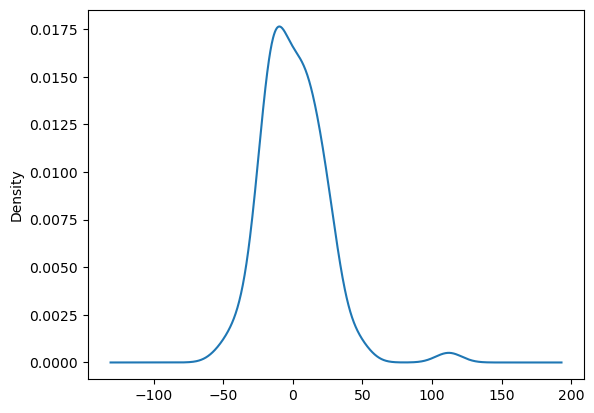

In [73]:
model_fit.resid.plot(kind='kde')

We can notice that ARIMA is not giving good result on this dataset because it is a seasonal dataset.

In [77]:
## importing SARIMAX
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [78]:
model_SARIMAX = SARIMAX(train_data['Thousands of Passengers'], order=(3,0,5),seasonal_order=(0,1,0,12))

In [79]:
SARIMAX_fit=model_SARIMAX.fit()

In [80]:
SARIMAX_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:             Thousands of Passengers   No. Observations:                   84
Model:             SARIMAX(3, 0, 5)x(0, 1, [], 12)   Log Likelihood                -265.239
Date:                             Sat, 23 Dec 2023   AIC                            548.479
Time:                                     01:17:05   BIC                            568.969
Sample:                                 01-01-1949   HQIC                           556.636
                                      - 12-01-1955                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5906      0.946      0.625      0.532      -1.263       2.444
ar.L2          0.8324      0.231      3.597      0.000       0.379       1.286
ar.L3         -0.4460      0.901     -0.495      0.620      -2.211       1.319
ma.L1          0.1922      1.213      0.158      0.874      -2.185       2.569
ma.L2         -0.5287      1.307     -0.405      0.686      -3.090       2.032
ma.L3         -0.1005      0.398     -0.252      0.801      -0.881       0.680
ma.L4         -0.1284      0.360     -0.357      0.721      -0.833       0.576
ma.L5          0.2453      0.370      0.663      0.508      -0.480       0.971
sigma2        87.7420     87.013      1.008      0.313     -82.799     258.283
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 2.67
Prob(Q):                              0.88   Prob(JB):                         0.26
Heteroskedasticity (H):               2.04   Skew:                             0.46
Prob(H) (two-sided):                  0.09   Kurtosis:                         2.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [81]:
test_data.tail()

,Thousands of Passengers,First Diff,Second Diff,12 Diff
Month,,,,
1960-08-01,606.0,-16.0,-103.0,47.0
1960-09-01,508.0,-98.0,-82.0,45.0
1960-10-01,461.0,-47.0,51.0,54.0
1960-11-01,390.0,-71.0,-24.0,28.0
1960-12-01,432.0,42.0,113.0,27.0


In [82]:
pred_start_date

Timestamp('1956-01-01 00:00:00')

In [83]:
pred_end_date

Timestamp('1960-12-01 00:00:00')

In [84]:
pred_SARIMAX=SARIMAX_fit.predict(start=pred_start_date, end=pred_end_date)

In [87]:
test_data['SARIMAX Predictions']=pred_SARIMAX

<Axes: xlabel='Month'>

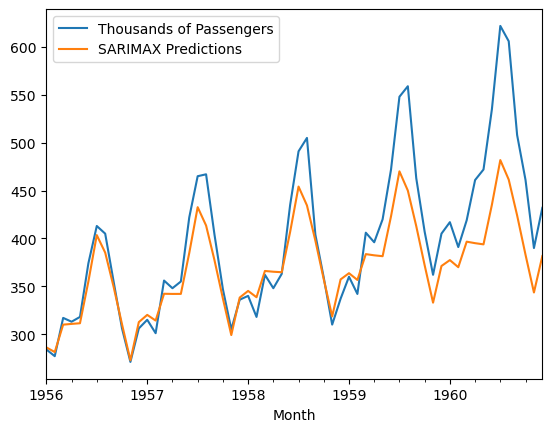

In [89]:
test_data[['Thousands of Passengers','SARIMAX Predictions']].plot()

## The End